# Unsupervised machine Learning

From the given ‘Iris’ dataset, predict the optimum number of
clusters and represent it visually.

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

In [3]:
data1 = pd.read_csv('Iris.csv')
data = data1.drop(['Species'], axis=1)
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [4]:
data.info

<bound method DataFrame.info of       Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]>

# Elbow Method

To find optimum number of clusters

In [5]:
DD = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data)
    DD.append(kmeans.inertia_)

In [6]:
frame = pd.DataFrame({'Cluster':range(1,20), 'DD':DD})

Text(0, 0.5, 'Inertia')

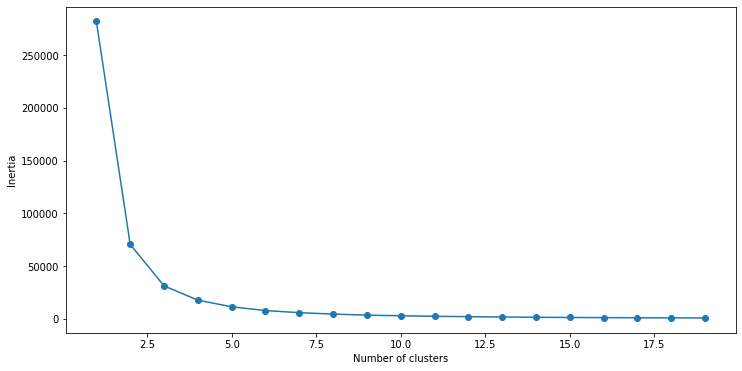

In [7]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['DD'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

We can see the curve changing near 2.5. So, taking clusters as 3

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
pred =  kmeans.predict(data)

In [9]:
pred
frame = pd.DataFrame(data)

In [10]:
frame['cluster'] = pred
frame['cluster'].value_counts()

2    50
1    50
0    50
Name: cluster, dtype: int64

# Visualizing the Model

In [13]:
x = data.iloc[:, [0, 1, 2, 3]].values
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
pred = kmeans.fit_predict(x)

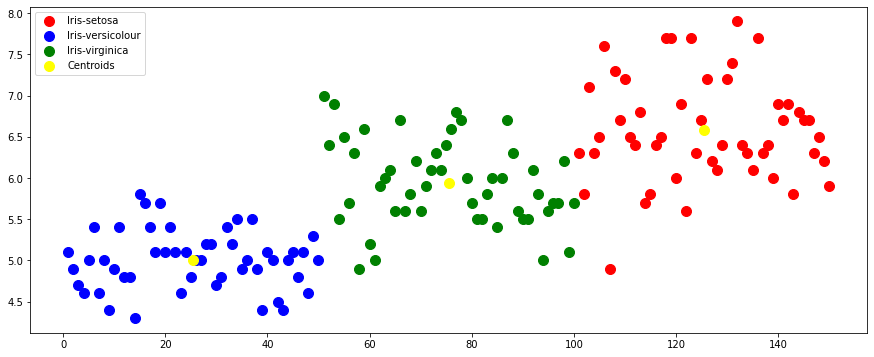

In [15]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(15,6))
plt.scatter(x[pred == 0, 0], x[pred == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[pred == 1, 0], x[pred == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[pred == 2, 0], x[pred == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()


The model has formed three clusters according to the data